In [1]:
import easygems.healpix as egh
import xarray as xr

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Figure size 640x480 with 0 Axes>

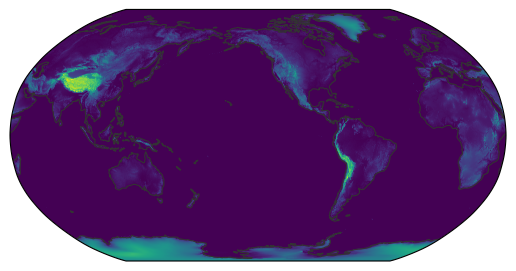

<Figure size 640x480 with 0 Axes>

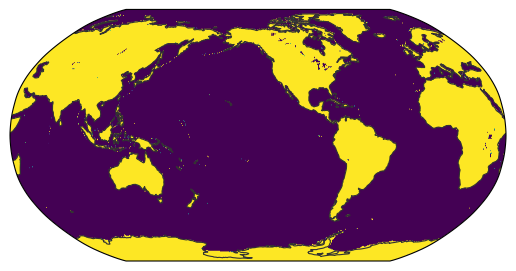

In [4]:
import easygems.healpix as egh
import intake
import matplotlib.pyplot as plt

cat = intake.open_catalog('https://raw.githubusercontent.com/digital-earths-global-hackathon/catalog/refs/heads/uk-um-add-static-file/catalog.yaml')['UK']
ds = cat['um_glm_n2560_RAL3p3'](zoom=10, time='static').to_dask()
egh.healpix_show(ds.orog)
plt.figure()
egh.healpix_show(ds.sftlf)

In [5]:
cat = intake.open_catalog('https://raw.githubusercontent.com/digital-earths-global-hackathon/catalog/refs/heads/uk-um-add-static-file/catalog.yaml')['UK']
cat['um_glm_n2560_RAL3p3'](zoom=10, time='static').urlpath


'http://hackathon-o.s3.jc.rl.ac.uk/sim-data/dev/v5/glm.n2560_RAL3p3/um.static.hp_z10.zarr'

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [16]:
import numpy as np
np.isnan(ds.orog.values).all()

np.False_

<Figure size 640x480 with 0 Axes>

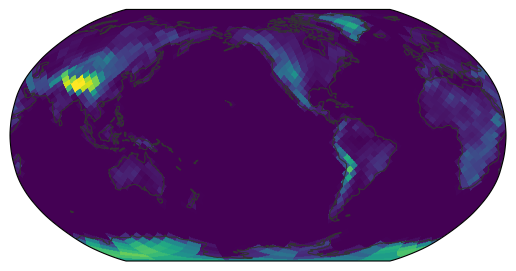

In [17]:
egh.healpix_show(ds.orog)

<Figure size 640x480 with 0 Axes>

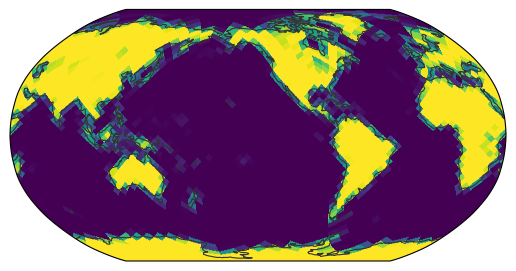

In [19]:
egh.healpix_show(ds.sftlf)

<Figure size 640x480 with 0 Axes>

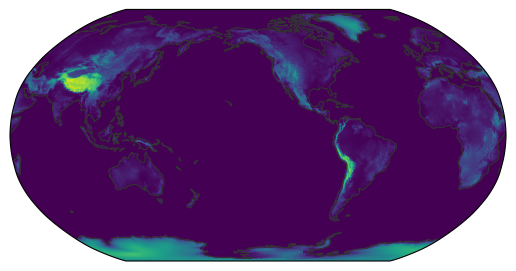

In [30]:
corog = ds.orog.coarsen(cell=4**2).mean()
corog['cell'] = np.arange(len(corog.cell))
#corog.crs['healpix_nside'] = 2**7
del corog['crs']
crs = xr.DataArray(
    name="crs",
    attrs={
        "grid_mapping_name": "healpix",
        "healpix_nside": 2 ** 7,
        "healpix_order": "nest",
    },
)

corog.assign_coords(crs=crs)
egh.healpix_show(corog)


In [7]:
ds8 = cat['um_glm_n1280_CoMA9_TBv1p2'](zoom=8).to_dask()
ds8

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 792GB
Dimensions:        (cell: 786432, time: 10489)
Coordinates:
  * cell           (cell) int64 6MB 0 1 2 3 4 ... 786428 786429 786430 786431
    crs            float64 8B ...
  * time           (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/26)
    clivi          (time, cell) float32 33GB ...
    clt            (time, cell) float32 33GB ...
    clwvi          (time, cell) float32 33GB ...
    hflsd          (time, cell) float32 33GB ...
    hfssd          (time, cell) float32 33GB ...
    huss           (time, cell) float32 33GB ...
    ...             ...
    rsut           (time, cell) float32 33GB ...
    rsutcs         (time, cell) float32 33GB ...
    tas            (time, cell) float32 33GB ...
    ts             (time, cell) float32 33GB ...
    uas            (time, cell) float32 33GB ...
    vas            (time, cell) float32 33GB ...
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n1280_CoMA9

In [1]:
import iris

In [2]:
cubes = iris.load('/gws/nopw/j04/kscale/DYAMOND3_data/5km-RAL3/glm/field.pp/apa.pp/glm.n2560_RAL3p3.apa_20200120T00.pp')

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
cubes

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/iris/common/mixin.py:195: FutureWarning: You are using legacy date precision for Iris units - max precision is seconds. In future, Iris will use microsecond precision - available since cf-units version 3.3 - which may affect core behaviour. To opt-in to the new behaviour, set `iris.FUTURE.date_microseconds = True`.
  warnings.warn(message, category=FutureWarning)


[<iris 'Cube' of land_binary_mask / (1) (latitude: 3840; longitude: 5120)>,
<iris 'Cube' of surface_altitude / (m) (latitude: 3840; longitude: 5120)>]

In [4]:
land = cubes[0]
h = cubes[1]

In [7]:
import numpy as np
np.unique(land.data)

array([0, 1], dtype=int32)

In [8]:
import matplotlib.pyplot as plt

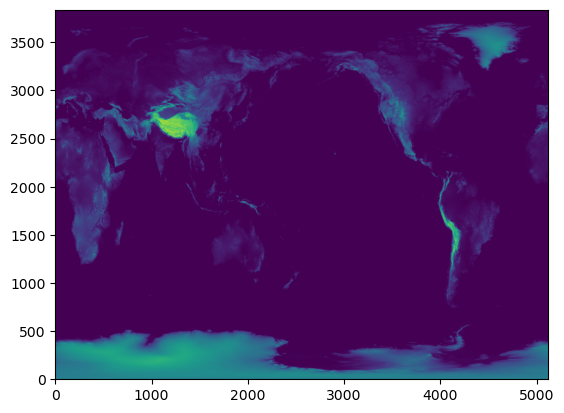

In [11]:
plt.imshow(h.data, origin='lower');

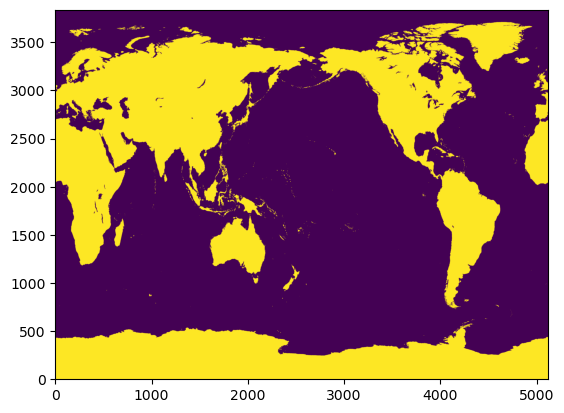

In [12]:
plt.imshow(land.data, origin='lower');

In [13]:
import sys

In [14]:
sys.path.insert(0, '/home/users/mmuetz/deploy/wcrp_hackathon/scripts/process_um_data')

In [15]:
import um_latlon_pp_to_healpix_nc as um2hp

In [16]:
import xarray as xr

In [17]:
daland = xr.DataArray.from_iris(land)

/tmp/ipykernel_601/3130836014.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  daland = xr.DataArray.from_iris(land)


In [18]:
daland

<xarray.DataArray 'land_binary_mask' (latitude: 3840, longitude: 5120)> Size: 79MB
[19660800 values with dtype=int32]
Coordinates:
  * latitude                 (latitude) float32 15kB -89.98 -89.93 ... 89.98
  * longitude                (longitude) float32 20kB 0.03516 0.1055 ... 360.0
    forecast_period          timedelta64[ns] 8B ...
    forecast_reference_time  datetime64[ns] 8B ...
    time                     datetime64[ns] 8B ...
Attributes:
    standard_name:  land_binary_mask
    source:         Data from Met Office Unified Model
    um_version:     13.5
    STASH:          m01s00i030

In [19]:
import um_process_tasks as umpt

In [21]:
from pathlib import Path
weights_path = Path('/gws/nopw/j04/hrcm/mmuetz/weights/') / umpt.weights_filename(daland, 10, 'longitude', 'latitude', True, False)

In [22]:
weights_path.exists()

True

In [23]:
regridder = um2hp.UMLatLon2HealpixRegridder(weights_path=weights_path)

In [25]:
dahpland = regridder.regrid(daland, 'longitude', 'latitude')

In [27]:
import easygems.healpix as egh

<Figure size 640x480 with 0 Axes>

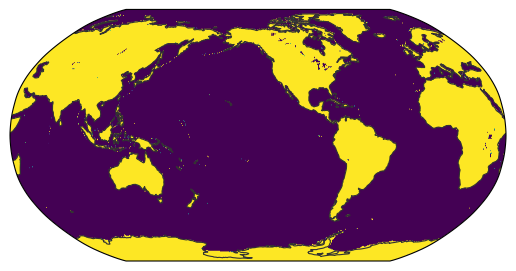

In [29]:
egh.healpix_show(dahpland);

<Figure size 640x480 with 0 Axes>

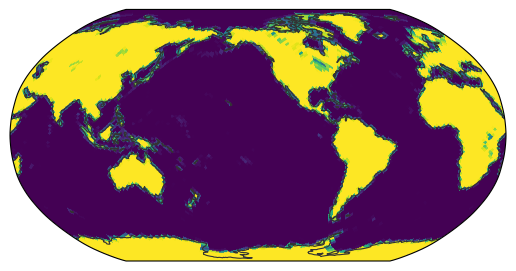

In [34]:
egh.healpix_show(dahpland.coarsen(cell=4**5).mean());

In [35]:
dah = xr.DataArray.from_iris(h)

/tmp/ipykernel_601/1969368048.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dah = xr.DataArray.from_iris(h)


In [37]:
dahph = regridder.regrid(dah, 'longitude', 'latitude')

<Figure size 640x480 with 0 Axes>

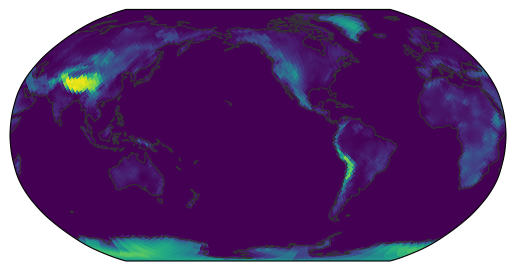

In [39]:
egh.healpix_show(dahph.coarsen(cell=4**5).mean());